The code is fully self-contained. 

The only requirement is to change the directory in which the data will be saved. It is important because the data downloaded will then be used in the second code.

# Data Download and Preparation

In this section of the code we will Download the 8 sectorial ETFs of the SP500 (main index for US listed stocks). 
We will then proceed to calculate the daily log returns of the ETFs and to then clean the data.

What are ETFs? "https://www.investopedia.com/terms/e/etf.asp"

[*********************100%***********************]  8 of 8 completed
C:\Users\alpor\AppData\Local\Temp\ipykernel_100004\2303167254.py:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.dropna(axis=1, how='all').fillna(method='ffill')
C:\Users\alpor\AppData\Local\Temp\ipykernel_100004\2303167254.py:41: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method="bfill", inplace=True)
C:\Users\alpor\AppData\Local\Temp\ipykernel_100004\2303167254.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method="ffill", inplace=True)


⚠️ 'Adj Close' non available, use 'Close' instead
Available period for each asset:
Ticker
XLE    6601
XLF    6601
XLI    6601
XLK    6601
XLP    6601
XLU    6601
XLV    6601
XLY    6601
dtype: int64
Ticker           XLE       XLF       XLI       XLK       XLP       XLU  \
Date                                                                     
1999-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
1999-01-05 -0.005373  0.009291  0.020435  0.025247  0.007512  0.012008   
1999-01-06  0.032464  0.031211  0.021264  0.029120  0.012018  0.010325   
1999-01-07 -0.004573  0.015248 -0.008701 -0.003144 -0.011442 -0.003601   
1999-01-08  0.004573  0.006285  0.007464  0.004040 -0.004036  0.005654   

Ticker           XLV       XLY  
Date                            
1999-01-04       NaN       NaN  
1999-01-05  0.015542  0.016707  
1999-01-06  0.016471  0.028006  
1999-01-07 -0.004678 -0.001151  
1999-01-08  0.012234  0.001151  


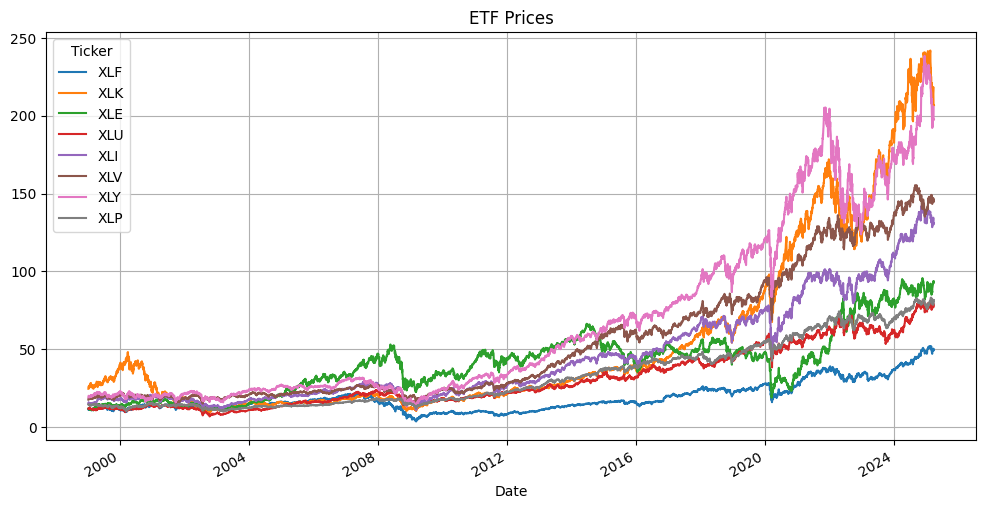

✅ Data saved in /data/v4.csv e /data/v4.csv


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ETF Tickers
tickers = ['XLF', 'XLK', 'XLE', 'XLU', 'XLI', 'XLV', 'XLY', 'XLP']

# Download data from Yahoo Finance

start_date = '1999-01-01' # Also works from end 1998.
# end_date = pd.Timestamp.today().strftime('%Y-%m-%d')  #used this line when I was doing the work, I had data until 2025-03-31, so I added a new line below to get my same results
end_date = '2025-04-01'

# Downloads all available data
data = yf.download(tickers, start=start_date, end=end_date)

# Checks available columns
#print("Columns available:", data.columns)

# Use 'Close' instead of 'Adj Close' if not available
if 'Adj Close' in data:
    data = data['Adj Close']
else:
    print("⚠️ 'Adj Close' non available, use 'Close' instead")
    data = data['Close']

# Rimuove eventuali colonne completamente vuote
data = data.dropna(axis=1, how='all').fillna(method='ffill')

# Verify availabilities historical data
print("Available period for each asset:")
print(data.count())

# Calculating Log Returns
# In finance is common to use log returns over normal returns because this guarantees many properties.
returns = data.pct_change().apply(lambda x: np.log1p(x))

# Fulls eventually NaNs in the dataset
data.interpolate(method="linear", inplace=True)
data.fillna(method="bfill", inplace=True)
data.fillna(method="ffill", inplace=True)

print(returns.head(5))

# Plot
data[['XLF', 'XLK', 'XLE', 'XLU', 'XLI', 'XLV', 'XLY', 'XLP']].plot(figsize=(12,6), title='ETF Prices')
plt.grid(True)
plt.show()

# Saving the data [IMPORTANT TO CHANGE THE DIRECTORIES]

data.to_csv(r"C:\Users\alpor\OneDrive\Desktop\politecnico\CORSI ERASMUS\MACHINE LEARNING\PROGETTO\tcn-portfolio v4\DATA\etf_prices_v4.csv")
returns.to_csv(r"C:\Users\alpor\OneDrive\Desktop\politecnico\CORSI ERASMUS\MACHINE LEARNING\PROGETTO\tcn-portfolio v4\DATA\etf_returns_v4.csv")

print("✅ Data saved in /data/v4.csv e /data/v4.csv")